<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V7_Original_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Input
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [276]:
#original data
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
del df['id']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [277]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

In [278]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [279]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123,stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (569, 31)
tarin         :  (455, 30)
test          :  114


# SVM

In [280]:
# SVM
st = time.time()
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf',probability=True)
svm.fit(X_train, y_train)
send = time.time() - st
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)
(STr,STe, len(y_pred_svm))

(0.9538461538461539, 0.9473684210526315, 114)

In [281]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train SVM
    st = time.time()
    SCVsvm = SVC(C=0.1, gamma='auto', kernel='rbf', probability=True)
    SCVsvm.fit(X_train, y_train)
    elapsed = time.time() - st

    # Scores
    SCVSTr = SCVsvm.score(SVCX_train, SVCy_train)
    SCVSTe = SCVsvm.score(SVCX_test, SVCy_test)

    # Store metrics
    train_scores.append(SCVSTr)
    test_scores.append(SCVSTe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVSTr:.4f}")
    print(f"Testing Accuracy  : {SCVSTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

SCVSTr = np.mean(train_scores)
SCVSTe = np.mean(test_scores)
SCVsend = np.mean(times)
# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")


Fold 1
Training Accuracy : 0.9582
Testing Accuracy  : 0.9298
Training Time     : 0.04 seconds

Fold 2
Training Accuracy : 0.9560
Testing Accuracy  : 0.9386
Training Time     : 0.04 seconds

Fold 3
Training Accuracy : 0.9538
Testing Accuracy  : 0.9474
Training Time     : 0.04 seconds

Fold 4
Training Accuracy : 0.9473
Testing Accuracy  : 0.9737
Training Time     : 0.03 seconds

Fold 5
Training Accuracy : 0.9474
Testing Accuracy  : 0.9735
Training Time     : 0.04 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9526
Avg Test Accuracy  : 0.9526
Avg Time per Fold  : 0.04 seconds


#ANN

In [282]:
tf.random.set_seed(123)
st = time.time()

ANNmodel = Sequential()
ANNmodel.add(Input(shape=(X_train.shape[1],)))
ANNmodel.add(Dense(30, activation='relu'))
ANNmodel.add(Dense(15, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))

ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
ANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

aend = time.time() - st

ATr = ANNmodel.evaluate(X_train, y_train, verbose=0)[1]
ATe = ANNmodel.evaluate(X_test, y_test, verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test, verbose=0) > 0.5).astype("int32")
ATr,ATe, len(y_pred_ANN)

(0.9648351669311523, 0.9298245906829834, 114)

In [283]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Build and train ANN
    tf.random.set_seed(123)
    st = time.time()

    SCVANNmodel = Sequential()
    SCVANNmodel.add(Input(shape=(X_train.shape[1],)))
    SCVANNmodel.add(Dense(30, activation='relu'))
    SCVANNmodel.add(Dense(15, activation='relu'))
    SCVANNmodel.add(Dense(1, activation='sigmoid'))

    SCVANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
    SCVANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

    elapsed = time.time() - st

    SCVATr = SCVANNmodel.evaluate(SVCX_train, SVCy_train, verbose=0)[1]
    SCVATe = SCVANNmodel.evaluate(SVCX_test, SVCy_test, verbose=0)[1]

    # Store metrics
    train_scores.append(SCVATr)
    test_scores.append(SCVATe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVATr:.4f}")
    print(f"Testing Accuracy  : {SCVATe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

SCVATr = np.mean(train_scores)
SCVATe = np.mean(test_scores)
SCVaend = np.mean(times)
# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9451
Testing Accuracy  : 0.9561
Training Time     : 4.01 seconds

Fold 2
Training Accuracy : 0.9538
Testing Accuracy  : 0.9035
Training Time     : 4.11 seconds

Fold 3
Training Accuracy : 0.9429
Testing Accuracy  : 0.9649
Training Time     : 5.07 seconds

Fold 4
Training Accuracy : 0.9495
Testing Accuracy  : 0.9737
Training Time     : 3.88 seconds

Fold 5
Training Accuracy : 0.9627
Testing Accuracy  : 0.9735
Training Time     : 4.14 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9508
Avg Test Accuracy  : 0.9543
Avg Time per Fold  : 4.24 seconds


In [284]:
#XGBoost
st = time.time()
xgb = XGBClassifier(objective='binary:logistic',max_depth= 6,alpha= 10,learning_rate= 0.03,n_estimators=250)
xgb.fit(X_train, y_train)
xend = time.time() - st
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe, len(y_pred_xgb)

(0.9912087912087912, 0.9473684210526315, 114)

In [285]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SVCX_train, SVCX_test = X[train_index], X[test_index]
    SVCy_train, SVCy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train XGBoost model
    st = time.time()
    SCVxgb = XGBClassifier(
        objective='binary:logistic',
        max_depth=6,
        alpha=10,
        learning_rate=0.03,
        n_estimators=250,
        eval_metric='logloss'
    )
    SCVxgb.fit(SVCX_train, SVCy_train)
    elapsed = time.time() - st

    # Predict
    SVCy_pred_xgb = SCVxgb.predict(SVCX_test)

    # Accuracy scores
    SCVXTr = accuracy_score(SVCy_train, SCVxgb.predict(SVCX_train))
    SCVXTe = accuracy_score(SVCy_test, SVCy_pred_xgb)

    # Store metrics
    train_scores.append(SCVXTr)
    test_scores.append(SCVXTe)
    times.append(elapsed)

    # Display results
    print(f"Training Accuracy : {SCVXTr:.4f}")
    print(f"Testing Accuracy  : {SCVXTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9912
Testing Accuracy  : 0.9211
Training Time     : 0.77 seconds

Fold 2
Training Accuracy : 0.9868
Testing Accuracy  : 0.9386
Training Time     : 0.61 seconds

Fold 3
Training Accuracy : 0.9846
Testing Accuracy  : 0.9474
Training Time     : 1.48 seconds

Fold 4
Training Accuracy : 0.9890
Testing Accuracy  : 0.9474
Training Time     : 0.33 seconds

Fold 5
Training Accuracy : 0.9934
Testing Accuracy  : 0.9912
Training Time     : 0.35 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9890
Avg Test Accuracy  : 0.9491
Avg Time per Fold  : 0.71 seconds


In [286]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)

st = time.time()
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
kend = time.time() - st
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe, len(y_pred_knn)


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.9298

Number of Neighbors: 3
KNN model train accuracy score: 0.9824
KNN model test accuracy score: 0.9737

Number of Neighbors: 5
KNN model train accuracy score: 0.9780
KNN model test accuracy score: 0.9649

Number of Neighbors: 7
KNN model train accuracy score: 0.9714
KNN model test accuracy score: 0.9561

Number of Neighbors: 9
KNN model train accuracy score: 0.9714
KNN model test accuracy score: 0.9474

Number of Neighbors: 11
KNN model train accuracy score: 0.9736
KNN model test accuracy score: 0.9474

best neighbours:  3


(0.9824175824175824, 0.9736842105263158, 114)

In [287]:
# Track metrics
train_scores = []
test_scores = []
times = []


# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Find the best n_neighbors for this fold


    # Train with best n_neighbors
    st = time.time()
    SCVknn = KNeighborsClassifier(n_neighbors=3)
    SCVknn.fit(SCVX_train, SCVy_train)
    elapsed = time.time() - st

    SCVKTr = accuracy_score(SCVy_train, SCVknn.predict(SCVX_train))
    SCVKTe = accuracy_score(SCVy_test, SCVknn.predict(SCVX_test))

    # Store metrics
    train_scores.append(SCVKTr)
    test_scores.append(SCVKTe)
    times.append(elapsed)

    # Print results
    print(f"Training Accuracy : {SCVKTr:.4f}")
    print(f"Testing Accuracy  : {SCVKTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9802
Testing Accuracy  : 0.9474
Training Time     : 0.00 seconds

Fold 2
Training Accuracy : 0.9824
Testing Accuracy  : 0.9386
Training Time     : 0.00 seconds

Fold 3
Training Accuracy : 0.9824
Testing Accuracy  : 0.9649
Training Time     : 0.00 seconds

Fold 4
Training Accuracy : 0.9802
Testing Accuracy  : 1.0000
Training Time     : 0.00 seconds

Fold 5
Training Accuracy : 0.9803
Testing Accuracy  : 0.9823
Training Time     : 0.00 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9811
Avg Test Accuracy  : 0.9666
Avg Time per Fold  : 0.00 seconds


In [288]:
#RF
st = time.time()
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
rend = time.time() - st
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe, len(y_pred_rf)

(0.9758241758241758, 0.9473684210526315, 114)

In [289]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train Random Forest
    st = time.time()
    SCVrf = RandomForestClassifier(
        n_estimators=500,
        max_features='sqrt',
        max_samples=100,
        random_state=123
    )
    SCVrf.fit(SCVX_train, SCVy_train)
    elapsed = time.time() - st

    SCVRTr = accuracy_score(SCVy_train, SCVrf.predict(SCVX_train))
    SCVRTe = accuracy_score(SCVy_test, SCVrf.predict(SCVX_test))

    # Store metrics
    train_scores.append(SCVRTr)
    test_scores.append(SCVRTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVRTr:.4f}")
    print(f"Testing Accuracy  : {SCVRTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9780
Testing Accuracy  : 0.9298
Training Time     : 0.87 seconds

Fold 2
Training Accuracy : 0.9846
Testing Accuracy  : 0.9474
Training Time     : 0.85 seconds

Fold 3
Training Accuracy : 0.9758
Testing Accuracy  : 0.9649
Training Time     : 0.89 seconds

Fold 4
Training Accuracy : 0.9714
Testing Accuracy  : 0.9649
Training Time     : 0.90 seconds

Fold 5
Training Accuracy : 0.9737
Testing Accuracy  : 0.9646
Training Time     : 0.87 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9767
Avg Test Accuracy  : 0.9543
Avg Time per Fold  : 0.88 seconds


In [290]:
#LR
st = time.time()
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
lend = time.time() - st
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe, len(y_pred_lr)

(0.9846153846153847, 0.9736842105263158, 114)

In [291]:
# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold CV loop
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    SCVX_train, SCVX_test = X[train_index], X[test_index]
    SCVy_train, SCVy_test = y[train_index], y[test_index]

    print(f"\nFold {fold+1}")

    # Train Logistic Regression model
    st = time.time()
    SCVlr = LogisticRegression(
        C=0.1,
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        random_state=123
    )
    SCVlr.fit( SCVX_train,  SCVy_train)
    elapsed = time.time() - st

    SCVLTr = accuracy_score( SCVy_train, SCVlr.predict( SCVX_train))
    SCVLTe = accuracy_score( SCVy_test, SCVlr.predict( SCVX_test))


    # Store metrics
    train_scores.append(SCVLTr)
    test_scores.append(SCVLTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVLTr:.4f}")
    print(f"Testing Accuracy  : {SCVLTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.9802
Testing Accuracy  : 0.9649
Training Time     : 0.00 seconds

Fold 2
Training Accuracy : 0.9890
Testing Accuracy  : 0.9386
Training Time     : 0.00 seconds

Fold 3
Training Accuracy : 0.9802
Testing Accuracy  : 0.9912
Training Time     : 0.00 seconds

Fold 4
Training Accuracy : 0.9736
Testing Accuracy  : 1.0000
Training Time     : 0.00 seconds

Fold 5
Training Accuracy : 0.9803
Testing Accuracy  : 0.9646
Training Time     : 0.00 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.9807
Avg Test Accuracy  : 0.9719
Avg Time per Fold  : 0.00 seconds


In [292]:
'''
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')

    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final
  '''

'\ndef CVal(ML):\n\n  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")\n  del df[\'id\']\n\n  s = 0\n  e = round(df.shape[0]*.2)\n\n  y_pred = []\n  y_original = []\n\n  for i in range(5):\n\n    test_set  = df.iloc[s:e,:]\n    train_set = df.drop(test_set.index)\n\n    X_train = StandardScaler().fit_transform(train_set.drop(columns=[\'diagnosis\'])).copy()\n    y_train = encoder.fit_transform(train_set[\'diagnosis\']).copy()\n    X_test = StandardScaler().fit_transform(test_set.drop(columns=[\'diagnosis\'])).copy()\n    y_test = encoder.fit_transform(test_set[\'diagnosis\']).copy()\n\n    #svm = SVC(C=0.1, gamma=\'auto\', kernel = \'rbf\')\n\n    ML.fit(X_train, y_train)\n    y_pred_ML = ML.predict(X_test)\n\n\n    y_pred.append(y_pred_ML)\n    y_original.append(y_test)\n\n    s = e\n    e = e + round(df.shape[0]*.2)\n    if e-s < round(df.shape[0]*.2):\n      e = df.shape[0]+1\n\n  y_pred_final = []\n  y_original_final = []\n\n  t

In [293]:
def CVal(ML):
    # Load and clean dataset
    df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
    del df['id']

    # Separate features and target
    X = df.drop(columns=['diagnosis']).copy()
    y = df['diagnosis'].copy()

    # Encode labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Prepare StratifiedKFold

    SCVy_pred = []
    SCVy_original = []

    for train_index, test_index in skf.split(X, y):
        # Split data
        SCVX_train, SCVX_test = X.iloc[train_index], X.iloc[test_index]
        SCVy_train, SCVy_test = y[train_index], y[test_index]

        # Standardize
        scaler = StandardScaler().fit(SCVX_train)
        SCVX_train = scaler.transform(SCVX_train)
        SCVX_test = scaler.transform(SCVX_test)

        # Train model
        ML.fit(SCVX_train, SCVy_train)
        SCVy_pred_ML = ML.predict(SCVX_test)

        # Collect predictions
        SCVy_pred.append(SCVy_pred_ML)
        SCVy_original.append(SCVy_test)

    # Flatten predictions and true labels
    SCVy_pred_final = []
    SCVy_original_final = []

    for i in range(5):
        for j in range(len(SCVy_pred[i])):
            SCVy_pred_final.append(SCVy_pred[i][j])
            SCVy_original_final.append(SCVy_original[i][j])

    return SCVy_pred_final


In [294]:
'''
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(15, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final
  '''

'\ndef CValANN():\n\n  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")\n  del df[\'id\']\n\n  s = 0\n  e = round(df.shape[0]*.2)\n\n  y_pred = []\n  y_original = []\n\n  for i in range(5):\n\n    test_set  = df.iloc[s:e,:]\n    train_set = df.drop(test_set.index)\n\n    X_train = StandardScaler().fit_transform(train_set.drop(columns=[\'diagnosis\'])).copy()\n    y_train = encoder.fit_transform(train_set[\'diagnosis\']).copy()\n    X_test = StandardScaler().fit_transform(test_set.drop(columns=[\'diagnosis\'])).copy()\n    y_test = encoder.fit_transform(test_set[\'diagnosis\']).copy()\n\n    #svm = SVC(C=0.1, gamma=\'auto\', kernel = \'rbf\')\n    tf.random.set_seed(123)\n    ANNmodel = Sequential()\n    ANNmodel.add(Dense(30, activation=\'relu\', input_shape=(X_train.shape[1],)))\n    ANNmodel.add(Dense(15, activation=\'relu\'))\n    ANNmodel.add(Dense(1, activation=\'sigmoid\'))\n    ANNmodel.compile(loss=\'BinaryCrossentropy\', op

In [295]:
def CValANN():
    # Load and preprocess dataset
    df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
    del df['id']

    X = df.drop(columns=['diagnosis']).copy()
    y = df['diagnosis'].copy()

    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    SCVy_pred = []
    SCVy_original = []

    for train_index, test_index in skf.split(X, y):
        SCVX_train, SCVX_test = X.iloc[train_index], X.iloc[test_index]
        SCVy_train, SCVy_test = y[train_index], y[test_index]

        # Standardize
        scaler = StandardScaler().fit(SCVX_train)
        SCVX_train = scaler.transform(SCVX_train)
        SCVX_test = scaler.transform(SCVX_test)

        # ANN Model
        tf.random.set_seed(123)
        ANNmodel = Sequential()
        ANNmodel.add(Input(shape=(X_train.shape[1],)))
        ANNmodel.add(Dense(30, activation='relu'))
        ANNmodel.add(Dense(15, activation='relu'))
        ANNmodel.add(Dense(1, activation='sigmoid'))
        ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])
        ANNmodel.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

        SCVy_pred_ANN = (ANNmodel.predict(SCVX_test, verbose=0) > 0.5).astype("int32")

        SCVy_pred.append(SCVy_pred_ANN)
        SCVy_original.append(SCVy_test)

    SCVy_pred_fina = []
    SCVy_original_final = []

    try:
        for i in range(5):
            for j in range(len(SCVy_pred[i])):
                SCVy_pred_fina.append(SCVy_pred[i][j])
                SCVy_original_final.append(SCVy_original[i][j])
    except:
        pass

    SCVy_pred_final = [val[0] for val in SCVy_pred_fina]

    return SCVy_pred_final


In [296]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

In [297]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1


In [298]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

st = time.time()
model = tf.keras.Sequential([
    tf.keras.Input(shape=(DX_train.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2, verbose=0)
dend = time.time() - st

In [299]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
y_pred_DNN = (model.predict(DX_test) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe, len(y_pred_DNN)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(0.6263736486434937, 0.6228070259094238, 114)

In [300]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import time

# Prepare data
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata['y_test'].copy()

# Encode labels if necessary
encoder = LabelEncoder()
DNNY = encoder.fit_transform(DNNY)

# Standardize features
scaler = StandardScaler()
DNNX = scaler.fit_transform(DNNX)

# Stratified K-Fold initialization
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Track metrics
train_scores = []
test_scores = []
times = []

# Stratified 5-fold CV loop
for fold, (train_index, test_index) in enumerate(skf.split(DNNX, DNNY)):
    SCVX_train, SCVX_test = DNNX[train_index], DNNX[test_index]
    SCVy_train, SCVy_test = DNNY[train_index], DNNY[test_index]

    print(f"\nFold {fold+1}")

    # Train DNN
    tf.random.set_seed(123)
    st = time.time()

    SCVmodel = tf.keras.Sequential([
        tf.keras.Input(shape=(SCVX_train.shape[1],)),
        tf.keras.layers.Dense(30, activation='relu',),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(20, activation='relu'),
        tf.keras.layers.Dense(15, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    SCVmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    SCVmodel.fit(SCVX_train, SCVy_train, epochs=500, batch_size=64, validation_split=0.2, verbose=0)

    elapsed = time.time() - st

    # Evaluation
    SCVDTr = model.evaluate(SCVX_train, SCVy_train, verbose=0)[1]
    SCVDTe = model.evaluate(SCVX_test, SCVy_test, verbose=0)[1]

    # Store metrics
    train_scores.append(SCVDTr)
    test_scores.append(SCVDTe)
    times.append(elapsed)

    # Print fold results
    print(f"Training Accuracy : {SCVDTr:.4f}")
    print(f"Testing Accuracy  : {SCVDTe:.4f}")
    print(f"Training Time     : {elapsed:.2f} seconds")

# Summary
print("\n=== Cross-validation Summary ===")
print(f"Avg Train Accuracy : {np.mean(train_scores):.4f}")
print(f"Avg Test Accuracy  : {np.mean(test_scores):.4f}")
print(f"Avg Time per Fold  : {np.mean(times):.2f} seconds")



Fold 1
Training Accuracy : 0.6242
Testing Accuracy  : 0.6053
Training Time     : 74.86 seconds

Fold 2
Training Accuracy : 0.6242
Testing Accuracy  : 0.6053
Training Time     : 76.22 seconds

Fold 3
Training Accuracy : 0.6154
Testing Accuracy  : 0.6404
Training Time     : 77.77 seconds

Fold 4
Training Accuracy : 0.6176
Testing Accuracy  : 0.6316
Training Time     : 75.67 seconds

Fold 5
Training Accuracy : 0.6206
Testing Accuracy  : 0.6195
Training Time     : 79.71 seconds

=== Cross-validation Summary ===
Avg Train Accuracy : 0.6204
Avg Test Accuracy  : 0.6204
Avg Time per Fold  : 76.85 seconds


In [301]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe, SCVSTr,SCVSTe],
    "KNN":[KTr,KTe, SCVKTr,SCVKTe],
    "RF" :[RTr,RTe, SCVRTr,SCVRTe],
    "LR" :[LTr,LTe, SCVLTr,SCVLTe],
    "ANN":[ATr,ATe, SCVATr,SCVATe],
    "XGB":[XTr,XTe, SCVXTr,SCVXTe],
    "DNN":[DTr,DTe, SCVDTr,SCVDTe]})
acc.index = ["train", "test", "SCVTrain", "SCVTest"]
acc = acc.T
acc

,train,test,SCVTrain,SCVTest
SVM,0.953846,0.947368,0.952551,0.952585
KNN,0.982418,0.973684,0.980263,0.982301
RF,0.975824,0.947368,0.973684,0.964602
LR,0.984615,0.973684,0.980263,0.964602
ANN,0.964835,0.929825,0.950786,0.954339
XGB,0.991209,0.947368,0.993421,0.991150
DNN,0.626374,0.622807,0.620614,0.619469


### **AutoML Individual and AutoML DNN**

In [302]:
#H2O AutoML

In [303]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 hours 17 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_unknownUser_7mwzxz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.921 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [304]:
#train, valid = hdf.split_frame(ratios=[.8], seed=123)
#hdf = h2o.H2OFrame(df)
#hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hy = "diagnosis"
hx = list(df.columns)
hx.remove(hy)
hdf  = df.copy()
hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
train = h2o.H2OFrame(train1)
valid = h2o.H2OFrame(valid1)
train["diagnosis"] = train["diagnosis"].asfactor()
valid["diagnosis"] = valid["diagnosis"].asfactor()

st = time.time()
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", sort_metric='accuracy')
aml.train(x = hx, y = hy, training_frame = train,
          validation_frame = valid)
autoend = time.time() - st

best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:28:03.824: Project: AutoML_19_20250509_82803
08:28:03.825: 5-fold cross-validation will be used.
08:28:03.825: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
08:28:03.829: Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954
08:28:03.829: Build control seed: 123
08:28:03.829: training frame: Frame key: AutoML_19_20250509_82803_training_py_147_sid_a292    cols: 31    rows: 455  chunks: 1    size: 111919  checksum: -6999049652048799504
08:28:03.830: validation frame: Frame key: py_148_sid_a292    cols: 31    rows: 114  chunks: 1    size: 3

In [305]:
#y_pred_h2o = pd.DataFrame(h2o.as_list(best_model.predict(valid)))['predict']
y_pred_h2o = np.array(best_model.predict(valid).as_data_frame(use_multi_thread=True)['predict'])
y_test_h2o = np.array(valid1['diagnosis']).copy().astype(np.int32)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [306]:
lb = aml.leaderboard
lb.head()

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_19_20250509_82803,0.949451,0.98434,0.170914,0.980608,0.0562145,0.208348,0.0434089
DRF_1_AutoML_19_20250509_82803,0.956044,0.986471,0.255546,0.985057,0.0433552,0.186958,0.0349535
XRT_1_AutoML_19_20250509_82803,0.958242,0.989076,0.186773,0.986326,0.0462482,0.185875,0.0345494
XGBoost_3_AutoML_19_20250509_82803,0.962637,0.992175,0.105667,0.98925,0.0363438,0.173386,0.0300628
XGBoost_2_AutoML_19_20250509_82803,0.967033,0.99129,0.116476,0.988269,0.0333889,0.177387,0.0314663
GBM_2_AutoML_19_20250509_82803,0.967033,0.993555,0.0982281,0.990844,0.0403694,0.166536,0.0277343
GBM_4_AutoML_19_20250509_82803,0.969231,0.99407,0.0978783,0.991578,0.0397723,0.167164,0.0279438
GBM_1_AutoML_19_20250509_82803,0.969231,0.993164,0.0993037,0.990717,0.0293015,0.164931,0.0272023
GBM_3_AutoML_19_20250509_82803,0.973626,0.994543,0.0897099,0.992244,0.0269438,0.153898,0.0236846
GLM_1_AutoML_19_20250509_82803,0.975824,0.99479,0.0817313,0.992976,0.0263467,0.148979,0.0221946


In [307]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_19_20250509_82803


Model Summary: 
    number_of_trees
--  -----------------
    36

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.029074514855628383
RMSE: 0.17051250644931704
LogLoss: 0.12394929039565182
Mean Per-Class Error: 0.029270653158718393
AUC: 0.9940799769376494
AUCPR: 0.992056368504806
Gini: 0.9881599538752988

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4925362765789032
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      279  5    0.0176   (5.0/284.0)
1      7    164  0.0409   (7.0/171.0)
Total  286  169  0.0264   (12.0/455.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.492536     0.964706  38
max f2                       0.317989     0.971098  49
max f0point5                 0.514766     0.971395  37
max accuracy                 0.514766     0.973626  37
max precision                0.968002     1         0
max recall                   0.0588847    1         100
max specificity              0.968002     1         0
max absolute_mcc             0.492536     0.943696  38
max min_per_class_accuracy   0.402806     0.964912  42
max mean_per_class_accuracy  0.492536     0.970729  38
max tns                      0.968002     284       0
max fns                      0.968002     110       0
max fps                      0.0148769    284       134
max tps                      0.0588847    171       100
max tnr                      0.968002     1         0
max fnr                      0.968002     0.643275  0
max fpr                      0.0148769    1         134
max tpr                      0.0588847    1         100

Gains/Lift Table: Avg response rate: 37.58 %, avg score: 37.29 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.134066                    0.968002           2.66082    2.66082            1                0.968002   1                           0.968002            0.356725        0.356725                   166.082   166.082            0.356725
2        0.162637                    0.957612           2.66082    2.66082            1                0.957612   1                           0.966177            0.0760234       0.432749                   166.082   166.082            0.432749
3        0.2                         0.950501           2.66082    2.66082            1                0.953488   1                           0.963806            0.0994152       0.532164                   166.082   166.082            0.532164
4        0.301099                    0.807568           2.66082    2.66082            1                0.897179   1                           0.941435            0.269006        0.80117                    166.082   166.082            0.80117
5        0.4                         0.314704           1.83301    2.45614            0.688889         0.582323   0.923077                    0.852644            0.181287        0.982456                   83.3008   145.614            0.93316
6        0.501099                    0.076693           0.0578439  1.97227            0.0217391        0.161579   0.741228                    0.713218            0.00584795      0.988304                   -94.2156  97.2274            0.780558
7        0.624176                    0.0503081          0.0950292  1.60211            0.0357143        0.058398  

In [308]:
best_model.model_performance(train).accuracy()

[[0.5147656202316284, 0.9736263736263736]]

In [309]:
y_test_h2o

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)

In [310]:
def SCVhdf(df):
  #train, valid = hdf.split_frame(ratios=[.8], seed=123)
  #hdf = h2o.H2OFrame(df)
  #hdf["diagnosis"] = hdf["diagnosis"].asfactor()
  hy = "diagnosis"
  hx = list(df.columns)
  hx.remove(hy)
  hdf  = df.copy()
  hdf.iloc[:,1:] = StandardScaler().fit_transform(hdf.iloc[:,1:])
  hdf.iloc[:,0] = LabelEncoder().fit_transform(hdf.iloc[:,0])
  hdf.iloc[:,0] = hdf.iloc[:,0].astype('category')
  train1, valid1 = train_test_split(hdf, test_size=0.2,random_state=123)
  train = h2o.H2OFrame(train1)
  valid = h2o.H2OFrame(valid1)
  train["diagnosis"] = train["diagnosis"].asfactor()
  valid["diagnosis"] = valid["diagnosis"].asfactor()

  st = time.time()
  aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=5, sort_metric='accuracy')
  aml.train(x = hx, y = hy, training_frame = train,
            validation_frame = valid)
  autoend = time.time() - st

  best_model = aml.get_best_model()
  HATr  = best_model.model_performance(train)
  HATe  = best_model.model_performance(valid)
  return HATr, HATe
SCVHATr, SCVHATe = SCVhdf(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:29:12.798: Project: AutoML_20_20250509_82912
08:29:12.800: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
08:29:12.801: Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954
08:29:12.801: Build control seed: 123
08:29:12.801: training frame: Frame key: AutoML_20_20250509_82912_training_py_157_sid_a292    cols: 31    rows: 455  chunks: 1    size: 111919  checksum: -6999049652048799504
08:29:12.801: validation frame: Frame key: py_158_sid_a292    cols: 31    rows: 114  chunks: 1    size: 30037  checksum: 1244986154056216624
08:29:12.801: le

In [311]:
#SFOLD DATA AUTOML
#strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
shdf  = newdata.copy()
#shdf['y_test'] = shdf['y_test'].replace(0,"B")
#shdf['y_test'] = shdf['y_test'].replace(1,"M")
shy = "y_test"
shx = list(shdf.columns)
shx.remove(shy)

shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
#shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
strain = h2o.H2OFrame(strain1)
svalid = h2o.H2OFrame(svalid1)
strain["y_test"] = strain["y_test"].asfactor()
svalid["y_test"] = svalid["y_test"].asfactor()

st = time.time()


saml = H2OAutoML(include_algos = ['DeepLearning'],max_models = 10, seed = 123, verbosity="info", sort_metric='accuracy')


saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sautoend = time.time() - st
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

<ipython-input-311-5d92bdc4dfd6>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.36884527 -0.73054276  1.36884527  1.36884527  1.36884527  1.36884527
 -0.73054276  1.36884527  1.36884527 -0.73054276  1.36884527 -0.73054276
 -0.73054276  1.36884527 -0.73054276  1.36884527 -0.73054276 -0.73054276
 -0.73054276 -0.73054276 -0.73054276 -0.73054276  1.36884527 -0.73054276
  1.36884527  1.36884527 -0.73054276  1.36884527 -0.73054276 -0.73054276
 -0.73054276  1.36884527 -0.73054276 -0.73054276  1.36884527 -0.73054276
  1.36884527  1.36884527 -0.73054276 -0.73054276  1.36884527 -0.73054276
 -0.73054276  1.36884527 -0.73054276 -0.73054276  1.36884527 -0.73054276
  1.36884527 -0.73054276 -0.73054276 -0.73054276 -0.73054276  1.36884527
  1.36884527  1.36884527 -0.73054276  1.36884527  1.36884527 -0.73054276
 -0.73054276 -0.73054276  1.36884527 -0.73054276 -0.73054276 -0.73054276
 -0.73054276  1.36884527 -0.73054276  1.36

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:30:21.776: Project: AutoML_21_20250509_83021
08:30:21.776: 5-fold cross-validation will be used.
08:30:21.777: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
08:30:21.777: Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954
08:30:21.777: Build control seed: 123
08:30:21.777: training frame: Frame key: AutoML_21_20250509_83021_training_py_164_sid_a292    cols: 7    rows: 455  chunks: 1    size: 6691  checksum: 3864364185958266976
08:30:21.778: validation frame: Frame key: py_165_sid_a292    cols: 7    rows: 114  chunks: 1    size: 2557  

In [312]:
sHATe

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.23126613667018606
RMSE: 0.4809013793598289
LogLoss: 0.65195596836825
Mean Per-Class Error: 0.4520547945205479
AUC: 0.5060140327430671
AUCPR: 0.3478262733527602
Gini: 0.01202806548613422

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3823572083523052
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      7    66   0.9041   (66.0/73.0)
1      0    41   0        (0.0/41.0)
Total  7    107  0.5789   (66.0/114.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.382357     0.554054  3
max f2                       0.382357     0.756458  3
max f0point5                 0.382357     0.4371    3
max accuracy                 0.762745     0.631579  0
max precision                0.382357     0.383178  3
max recall                   0.382357     1         3
max specificity              0.762745     0.986301  0
max absolute_mcc             0.382357     0.191685  3
max min_per_class_accuracy   0.4175       0.365854  1
max mean_per_class_accuracy  0.382357     0.547945  3
max tns                      0.762745     72        0
max fns                      0.762745     41        0
max fps                      0.0296183    73        8
max tps                      0.382357     41        3
max tnr                      0.762745     0.986301  0
max fnr                      0.762745     1         0
max fpr                      0.0296183    1         8
max tpr                      0.382357     1         3

Gains/Lift Table: Avg response rate: 35.96 %, avg score: 39.83 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.385965                    0.4175             0.947894  0.947894           0.340909         0.425347  0.340909                    0.425347            0.365854        0.365854                   -5.21064  -5.21064           -0.0314066
2        0.929825                    0.399446           1.12116   1.04924            0.403226         0.399446  0.377358                    0.410197            0.609756        0.97561                    12.1164   4.92407            0.0715002
3        1                           0.0296183          0.347561  1                  0.125            0.240641  0.359649                    0.398299            0.0243902       1                          -65.2439  0                  0

In [313]:
def SCVshdf(newdata):
  #SFOLD DATA AUTOML
  #strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
  shdf  = newdata.copy()
  #shdf['y_test'] = shdf['y_test'].replace(0,"B")
  #shdf['y_test'] = shdf['y_test'].replace(1,"M")
  shy = "y_test"
  shx = list(shdf.columns)
  shx.remove(shy)

  shdf.iloc[:,0:6] = StandardScaler().fit_transform(shdf.iloc[:,0:6])
  #shdf.iloc[:,-1] = LabelEncoder().fit_transform(shdf.iloc[:,-1])
  strain1, svalid1 = train_test_split(shdf, test_size=0.2,random_state=123)
  strain = h2o.H2OFrame(strain1)
  svalid = h2o.H2OFrame(svalid1)
  strain["y_test"] = strain["y_test"].asfactor()
  svalid["y_test"] = svalid["y_test"].asfactor()

  st = time.time()


  saml = H2OAutoML(include_algos = ['DeepLearning'],max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')


  saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
  sautoend = time.time() - st
  sbest_model = saml.get_best_model()
  sHATr  = sbest_model.model_performance(strain)
  sHATe  = sbest_model.model_performance(svalid)
  return sHATr, sHATe
SCVsHATr, SCVsHATe = SCVshdf(newdata)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |

<ipython-input-313-e7350dacbebd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.36884527 -0.73054276  1.36884527  1.36884527  1.36884527  1.36884527
 -0.73054276  1.36884527  1.36884527 -0.73054276  1.36884527 -0.73054276
 -0.73054276  1.36884527 -0.73054276  1.36884527 -0.73054276 -0.73054276
 -0.73054276 -0.73054276 -0.73054276 -0.73054276  1.36884527 -0.73054276
  1.36884527  1.36884527 -0.73054276  1.36884527 -0.73054276 -0.73054276
 -0.73054276  1.36884527 -0.73054276 -0.73054276  1.36884527 -0.73054276
  1.36884527  1.36884527 -0.73054276 -0.73054276  1.36884527 -0.73054276
 -0.73054276  1.36884527 -0.73054276 -0.73054276  1.36884527 -0.73054276
  1.36884527 -0.73054276 -0.73054276 -0.73054276 -0.73054276  1.36884527
  1.36884527  1.36884527 -0.73054276  1.36884527  1.36884527 -0.73054276
 -0.73054276 -0.73054276  1.36884527 -0.73054276 -0.73054276 -0.73054276
 -0.73054276  1.36884527 -0.73054276  1.36

████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:44:15.803: Project: AutoML_22_20250509_84415
08:44:15.803: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
08:44:15.803: Setting stopping tolerance adaptively based on the training frame: 0.04688072309384954
08:44:15.803: Build control seed: 123
08:44:15.803: training frame: Frame key: AutoML_22_20250509_84415_training_py_171_sid_a292    cols: 7    rows: 455  chunks: 1    size: 6691  checksum: 3864364185958266976
08:44:15.803: validation frame: Frame key: py_172_sid_a292    cols: 7    rows: 114  chunks: 1    size: 2557  checksum: 7632085554672578544
08:44:15.803: leaderboard frame: NULL
08:44:15.803: blending frame: NULL
08:44:15.803: response column: y_test
08:44:15.803: fold colu

In [314]:
sbest_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_21_20250509_83021_model_3


Status of Neuron Layers: predicting y_test, 2-class classification, bernoulli distribution, CrossEntropy loss, 452 weights/biases, 9.5 KB, 2,584,400 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight          weight_rms          mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  ---------------------  ----------  -------------------  ------------------  --------------------  -------------------
    1        6        Input             5.0
    2        50       RectifierDropout  20.0       0.0   0.0   0.04141052315089231   0.057576969265937805   0.0         -0.1236626791053762  1.2216238975524902  -2.1185772032523924   2.3408308029174805
    3        2        Softmax                      0.0   0.0   0.001571682429057546  0.0015304619446396828  0.0         0.04119396212045103  0.5925519466400146  -0.01999339214365116  0.12572908401489258

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.22658068382541427
RMSE: 0.47600491995925237
LogLoss: 0.6399438775158185
Mean Per-Class Error: 0.4747549625236801
AUC: 0.5543612552508032
AUCPR: 0.4497979891608425
Gini: 0.1087225105016063

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3404688987455928
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      16   268  0.9437   (268.0/284.0)
1      1    170  0.0058   (1.0/171.0)
Total  17   438  0.5912   (269.0/455.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.340469     0.558292  12
max f2                       0.278603     0.759325  14
max f0point5                 0.399446     0.442667  9
max accuracy                 0.695681     0.637363  5
max precision                0.984772     1         0
max recall                   0.278603     1         14
max specificity              0.984772     1         0
max absolute_mcc             0.278603     0.133076  14
max min_per_class_accuracy   0.4175       0.374269  8
max mean_per_class_accuracy  0.4175       0.530444  8
max tns                      0.984772     284       0
max fns                      0.984772     170       0
max fps                      0.00104882   284       22
max tps                      0.278603     171       14
max tnr                      0.984772     1         0
max fnr                      0.984772     0.994152  0
max fpr                      0.00104882   1         22
max tpr                      0.278603     1         14

Gains/Lift Table: Avg response rate: 37.58 %, avg score: 40.27 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.0153846                   0.781334           2.2807    2.2807             0.857143         0.880542  0.857143                    0.880542            0.0350877       0.0350877                  128.07     128.07             0.0315666
2        0.021978                    0.680573           1.77388   2.12865            0.666667         0.695681  0.8                         0.825084            0.0116959       0.0467836                  77.3879    112.865            0.0397414
3        0.0307692                   0.456775           1.33041   1.90058            0.5       

In [315]:
saml.leaderboard

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_21_20250509_83021_model_3,0.621978,0.450653,0.683858,0.337307,0.489437,0.494315,0.244347
DeepLearning_grid_2_AutoML_21_20250509_83021_model_2,0.621978,0.484011,0.699029,0.368307,0.489437,0.497686,0.247691
DeepLearning_grid_2_AutoML_21_20250509_83021_model_3,0.621978,0.443981,0.68223,0.337563,0.4906,0.493816,0.243854
DeepLearning_grid_1_AutoML_21_20250509_83021_model_2,0.621978,0.530805,0.693847,0.397136,0.488242,0.494565,0.244595
DeepLearning_grid_2_AutoML_21_20250509_83021_model_1,0.621978,0.432162,0.692146,0.326449,0.492958,0.495433,0.245454
DeepLearning_1_AutoML_21_20250509_83021,0.624176,0.496201,0.766961,0.370906,0.487614,0.516922,0.267209
DeepLearning_grid_3_AutoML_21_20250509_83021_model_3,0.624176,0.492608,0.664501,0.357044,0.484155,0.485872,0.236072
DeepLearning_grid_3_AutoML_21_20250509_83021_model_1,0.624176,0.515639,0.67657,0.369973,0.488839,0.491821,0.241888
DeepLearning_grid_3_AutoML_21_20250509_83021_model_2,0.624176,0.524648,0.671219,0.39873,0.488839,0.487279,0.237441
DeepLearning_grid_1_AutoML_21_20250509_83021_model_1,0.626374,0.503428,0.729475,0.373927,0.493524,0.507097,0.257148


In [316]:
!pip install polars pyarrow

In [317]:
#y_pred_sh2o = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))['predict']
y_pred_sh2o = np.array(pd.DataFrame(sbest_model.predict(svalid).as_data_frame(use_multi_thread=True))['predict'])
y_test_sh2o = np.array(svalid1['y_test']).copy()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [318]:
y_pred_sh2o

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1])

<BarContainer object of 7 artists>

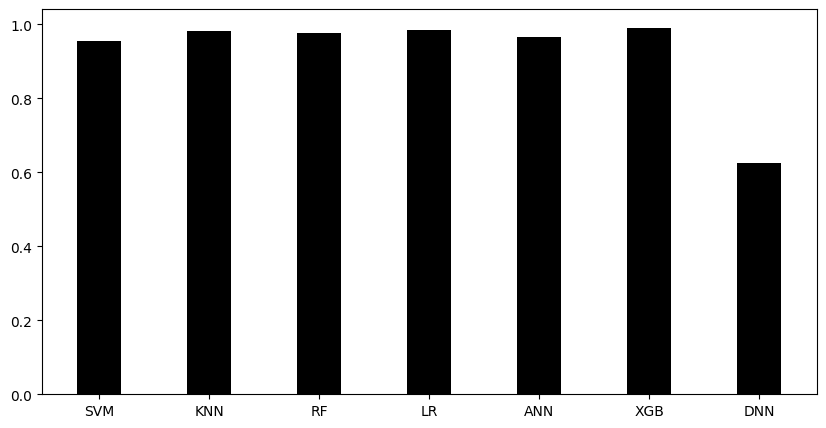

In [319]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [320]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

label = ["ArtificialNeuralNetwork", 'DeepNeuralNetwork',
         'KNearestNeighborsClassifier', 'LogisticRegression',
         'RandomForestClassifier', 'SupportVectorClassifier',
         'XGBoost', type(best_model).__name__, type(sbest_model).__name__ ]

acc = pd.DataFrame(
    {
    "ANN":[ATr,ATe, SCVATr,SCVATe],
    "DNN":[DTr,DTe, SCVDTr,SCVDTe],
    "KNN":[KTr,KTe, SCVKTr,SCVKTe],
    "LR" :[LTr,LTe, SCVLTr,SCVLTe],
    "RF" :[RTr,RTe, SCVRTr,SCVRTe],
    "SVM":[STr,STe, SCVSTr,SCVSTe],
    "XGB":[XTr,XTe, SCVXTr,SCVXTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1], SCVHATr.accuracy()[0][1], SCVHATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1], SCVsHATr.accuracy()[0][1], SCVsHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test", "SCVTrain", "SCVTest"]
acc = acc.T
acc['Model'] = label

acc = acc[['Model', 'train', 'test', "SCVTrain", "SCVTest"]]
#acc['avg'] = round((acc['train'] + acc['test'])/2, 6)
#acc[acc["avg"] == acc["avg"].max()]
#acc['BestModel'] = 0

acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))



In [321]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.964835,0.929825,0.950786,0.954339,0.0,0.0,0.0
DNN,DeepNeuralNetwork,0.626374,0.622807,0.620614,0.619469,0.0,0.0,0.0
KNN,KNearestNeighborsClassifier,0.982418,0.973684,0.980263,0.982301,0.0,0.0,0.0
LR,LogisticRegression,0.984615,0.973684,0.980263,0.964602,0.0,0.0,0.0
RF,RandomForestClassifier,0.975824,0.947368,0.973684,0.964602,0.0,0.0,0.0
SVM,SupportVectorClassifier,0.953846,0.947368,0.952551,0.952585,0.0,0.0,0.0
XGB,XGBoost,0.991209,0.947368,0.993421,0.991150,0.0,0.0,0.0
H_OD,H2OXGBoostEstimator,0.973626,0.964912,0.973626,0.964912,0.0,0.0,0.0
H_SOD,H2ODeepLearningEstimator,0.637363,0.631579,0.637363,0.640351,0.0,0.0,0.0


In [322]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.964835,0.929825,0.950786,0.954339,0.0,0.0,0.0
DNN,DeepNeuralNetwork,0.626374,0.622807,0.620614,0.619469,0.0,0.0,0.0
KNN,KNearestNeighborsClassifier,0.982418,0.973684,0.980263,0.982301,0.0,0.0,0.0
LR,LogisticRegression,0.984615,0.973684,0.980263,0.964602,0.0,0.0,0.0
RF,RandomForestClassifier,0.975824,0.947368,0.973684,0.964602,0.0,0.0,0.0
SVM,SupportVectorClassifier,0.953846,0.947368,0.952551,0.952585,0.0,0.0,0.0
XGB,XGBoost,0.991209,0.947368,0.993421,0.991150,0.0,0.0,0.0
H_OD,H2OXGBoostEstimator,0.973626,0.964912,0.973626,0.964912,0.0,0.0,0.0
H_SOD,H2ODeepLearningEstimator,0.637363,0.631579,0.637363,0.640351,0.0,0.0,0.0


In [323]:
y_pred_ANNn = []
y_pred_DNNn = []
for i in range(len(y_pred_ANN)):
  y_pred_ANNn.append(y_pred_ANN[i][0])
  y_pred_DNNn.append(y_pred_DNN[i][0])

In [324]:
pred = [np.array(y_pred_ANNn), np.array(y_pred_DNNn), y_pred_knn,
        y_pred_lr, y_pred_rf,
        y_pred_svm, y_pred_xgb, y_pred_h2o, y_pred_sh2o]

tes  = [y_test_indi_ML, np.array(Dy_test), y_test_indi_ML, y_test_indi_ML,
        y_test_indi_ML, y_test_indi_ML, y_test_indi_ML,
        y_test_h2o.copy(), y_test_sh2o.copy()]

In [325]:
tes

[array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0]),
 array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1]),
 array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

In [326]:
acc.iloc[:,5]

,Precision
ANN,0.0
DNN,0.0
KNN,0.0
LR,0.0
RF,0.0
SVM,0.0
XGB,0.0
H_OD,0.0
H_SOD,0.0


In [327]:
for i in range(len(pred)):
  p,r,f,_ = precision_recall_fscore_support(tes[i], pred[i],
                                            average='macro',zero_division=0)
  acc.iloc[i,5]= p
  acc.iloc[i,6]= r
  acc.iloc[i,7]= f
  p = 0
  r = 0
  f = 0
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score
ANN,ArtificialNeuralNetwork,0.964835,0.929825,0.950786,0.954339,0.924603,0.924603,0.924603
DNN,DeepNeuralNetwork,0.626374,0.622807,0.620614,0.619469,0.316964,0.486301,0.383784
KNN,KNearestNeighborsClassifier,0.982418,0.973684,0.980263,0.982301,0.974106,0.969246,0.971583
LR,LogisticRegression,0.984615,0.973684,0.980263,0.964602,0.969702,0.974206,0.971863
RF,RandomForestClassifier,0.975824,0.947368,0.973684,0.964602,0.938299,0.953373,0.944481
SVM,SupportVectorClassifier,0.953846,0.947368,0.952551,0.952585,0.940260,0.948413,0.943990
XGB,XGBoost,0.991209,0.947368,0.993421,0.991150,0.940260,0.948413,0.943990
H_OD,H2OXGBoostEstimator,0.973626,0.964912,0.973626,0.964912,0.958074,0.967257,0.962302
H_SOD,H2ODeepLearningEstimator,0.637363,0.631579,0.637363,0.640351,0.691589,0.547945,0.364527


<BarContainer object of 9 artists>

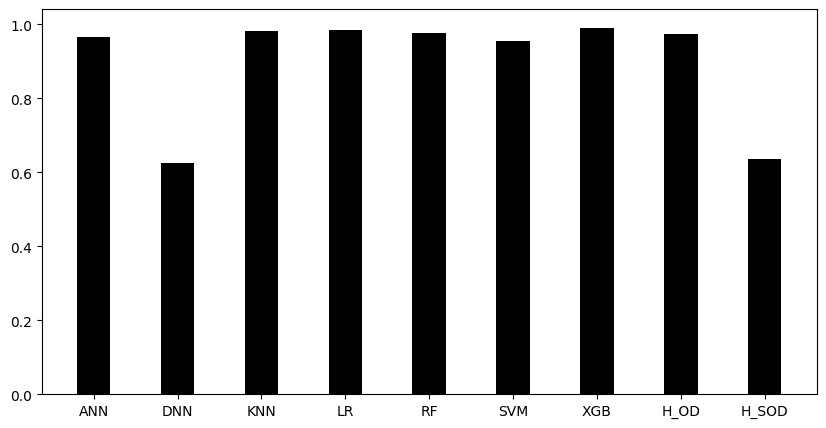

In [328]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)

In [329]:
from sklearn.metrics import roc_auc_score, roc_curve

In [330]:
m = [ANNmodel, model, knn, lr, rf, svm, xgb, best_model]

In [331]:
#encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
y_test_indi_ML = y_test.copy()

In [332]:
from sklearn import metrics

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


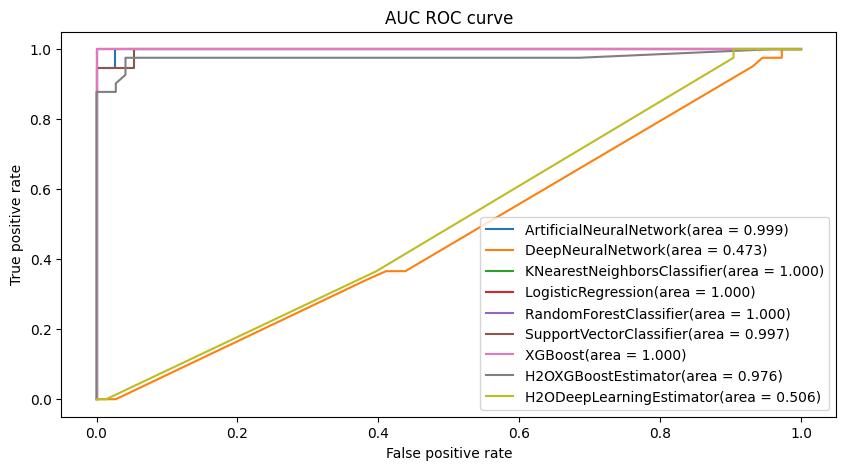

In [333]:
plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]

y_pred = ANNmodel.predict(X_test).ravel()
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[0]) + '(area = {:.3f})'.format(auc))

y_pred = model.predict(DX_test).ravel()
y_test = Dy_test.copy()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[1]) + '(area = {:.3f})'.format(auc))

y_pred = knn.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[2]) + '(area = {:.3f})'.format(auc))

y_pred = lr.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[3]) + '(area = {:.3f})'.format(auc))

y_pred = rf.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[4]) + '(area = {:.3f})'.format(auc))

y_pred = svm.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[5]) + '(area = {:.3f})'.format(auc))

y_pred = xgb.predict_proba(X_test)[:, 1]
y_test = y_test_indi_ML
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label=str(label[6]) + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(best_model.predict(valid)))
y_test = h2o.as_list(valid['diagnosis'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))

y_pred = pd.DataFrame(h2o.as_list(sbest_model.predict(svalid)))
y_test = h2o.as_list(svalid['y_test'])
fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
auc = metrics.roc_auc_score(y_test, y_pred["p1"])
plt.plot(fpr, tpr,label=type(sbest_model).__name__ + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [334]:
tm = [aend,dend,kend,lend,rend,send,xend,autoend,sautoend]

In [335]:
acc['time'] = 0

In [336]:
acc['time'] = tm

In [337]:
acc

,Model,train,test,SCVTrain,SCVTest,Precision,Recall,F1_Score,time
ANN,ArtificialNeuralNetwork,0.964835,0.929825,0.950786,0.954339,0.924603,0.924603,0.924603,5.586303
DNN,DeepNeuralNetwork,0.626374,0.622807,0.620614,0.619469,0.316964,0.486301,0.383784,74.244325
KNN,KNearestNeighborsClassifier,0.982418,0.973684,0.980263,0.982301,0.974106,0.969246,0.971583,0.000888
LR,LogisticRegression,0.984615,0.973684,0.980263,0.964602,0.969702,0.974206,0.971863,0.005752
RF,RandomForestClassifier,0.975824,0.947368,0.973684,0.964602,0.938299,0.953373,0.944481,0.845500
SVM,SupportVectorClassifier,0.953846,0.947368,0.952551,0.952585,0.940260,0.948413,0.943990,0.039052
XGB,XGBoost,0.991209,0.947368,0.993421,0.991150,0.940260,0.948413,0.943990,2.533981
H_OD,H2OXGBoostEstimator,0.973626,0.964912,0.973626,0.964912,0.958074,0.967257,0.962302,63.034867
H_SOD,H2ODeepLearningEstimator,0.637363,0.631579,0.637363,0.640351,0.691589,0.547945,0.364527,831.742351


In [338]:
acc.to_csv("Result_of_original_Data.csv")